# [1] Gemstone Price Prediction

#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### [i] Problem Statement

- This project uses Statustical Models of Machine Learning to understand the relationship 
in the data and how the price is dependent on the features.

### [ii] Data Collection

- Data Source - https://www.kaggle.com/competitions/playground-series-s3e8
- The dataset has 2 files.
  * train.csv
  * test.csv
- The dataset consist of 10 independent variables.


## [1.1] Necessary Packages Imports

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## [1.2] Import Train and Test Data

In [4]:
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')

### [1.2.1] Top 5 Records

In [5]:
train_df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [6]:
test_df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,193573,0.35,Ideal,D,VS2,62.3,56.0,4.51,4.54,2.82
1,193574,0.77,Very Good,F,SI2,62.8,56.0,5.83,5.87,3.68
2,193575,0.71,Ideal,I,VS2,61.9,53.0,5.77,5.74,3.55
3,193576,0.33,Ideal,G,VVS2,61.6,55.0,4.44,4.42,2.73
4,193577,1.20,Very Good,I,VS2,62.7,56.0,6.75,6.79,4.24


In [ ]:
train_df.drop('id', axis=1, inplace=True)
test_df.drop('id', axis=1, inplace=True)

[1.2.2] Shape / Dimensionality of Train and Test Data

In [8]:
train_df.shape

(193573, 11)

In [9]:
test_df.shape

(129050, 10)

## [1.3] Data Check to perform

- Check Missing Values
- Check Duplicates
- Check datatypes
- Check number of unique values for each column
- Check statistics of the data
- Check various categories present in the different categorical column

### [1.3.1] Check datatype and metadata

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


### [1.3.2] Checking the number of unique values of each column

In [12]:
train_df.nunique(axis=0)

id         193573
carat         248
cut             5
color           7
clarity         8
depth         153
table         108
x             522
y             521
z             349
price        8738
dtype: int64

### [1.3.3] Check for Missing Values

In [13]:
train_df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

There are no missing values in the dataset

### [1.3.3] Check for Duplicates

In [15]:
train_df.duplicated().sum()

0

There are no duplicates in the data set

### [1.3.4] Check statistics of Dataset

In [17]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,193573.0,96786.000000,55879.856166,0.0,48393.00,96786.00,145179.00,193572.00
carat,193573.0,0.790688,0.462688,0.2,0.40,0.70,1.03,3.50
depth,193573.0,61.820574,1.081704,52.1,61.30,61.90,62.40,71.60
table,193573.0,57.227675,1.918844,49.0,56.00,57.00,58.00,79.00
x,193573.0,5.715312,1.109422,0.0,4.70,5.70,6.51,9.65
y,193573.0,5.720094,1.102333,0.0,4.71,5.72,6.51,10.01
z,193573.0,3.534246,0.688922,0.0,2.90,3.53,4.03,31.30
price,193573.0,3969.155414,4034.374138,326.0,951.00,2401.00,5408.00,18818.00


* Coun of rows in (train_df.shape) = (train_df.describe) => No missing values
* max > mean & median for z which shows presence of outliers
* std are close between 0-1
* means and medians are almost similar

In [21]:
train_df.describe(include='object').T

,count,unique,top,freq
cut,193573,5,Ideal,92454
color,193573,7,G,44391
clarity,193573,8,SI1,53272


* ideal type is occured maore.

### [1.3.5] Explore Values for Categorical Columns

In [33]:
categorical_features = list(train_df.select_dtypes(include='object').columns)
numerical_features = list(train_df.select_dtypes(exclude='object'))
print(f'Numerical features in the data are: {numerical_features}')
print(f'Categorical features in the data are: {categorical_features}')

for feature in categorical_features:
    unique_clesses = train_df[feature].unique()
    print(f'Categories in "{feature}" feature:  {unique_clesses}')

Numerical features in the data are: ['id', 'carat', 'depth', 'table', 'x', 'y', 'z', 'price']
Categorical features in the data are: ['cut', 'color', 'clarity']
Categories in "cut" feature:  ['Premium' 'Very Good' 'Ideal' 'Good' 'Fair']
Categories in "color" feature:  ['F' 'J' 'G' 'E' 'D' 'H' 'I']
Categories in "clarity" feature:  ['VS2' 'SI2' 'VS1' 'SI1' 'IF' 'VVS2' 'VVS1' 'I1']


## [1.4] Dataset Information

### Introduction About the Data :

**The dataset**

* `id` : unique identifier of each diamond
* `carat` : Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.
* `cut` : Quality of Diamond Cut
* `color` : Color of Diamond
* `clarity` : Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.
* `depth` : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)
* `table` : A diamond's table is the facet which can be seen when the stone is viewed face up.
* `x` : Diamond X dimension
* `y` : Diamond Y dimension
* `x` : Diamond Z dimension

Target variable:
* `price`: Price of the given Diamond.

# [2] Exploratory Data Analysis

## [2.1] Univariate Analysis for Numerical features

0 id
1 carat
2 depth
3 table
4 x
5 y
6 z
7 price


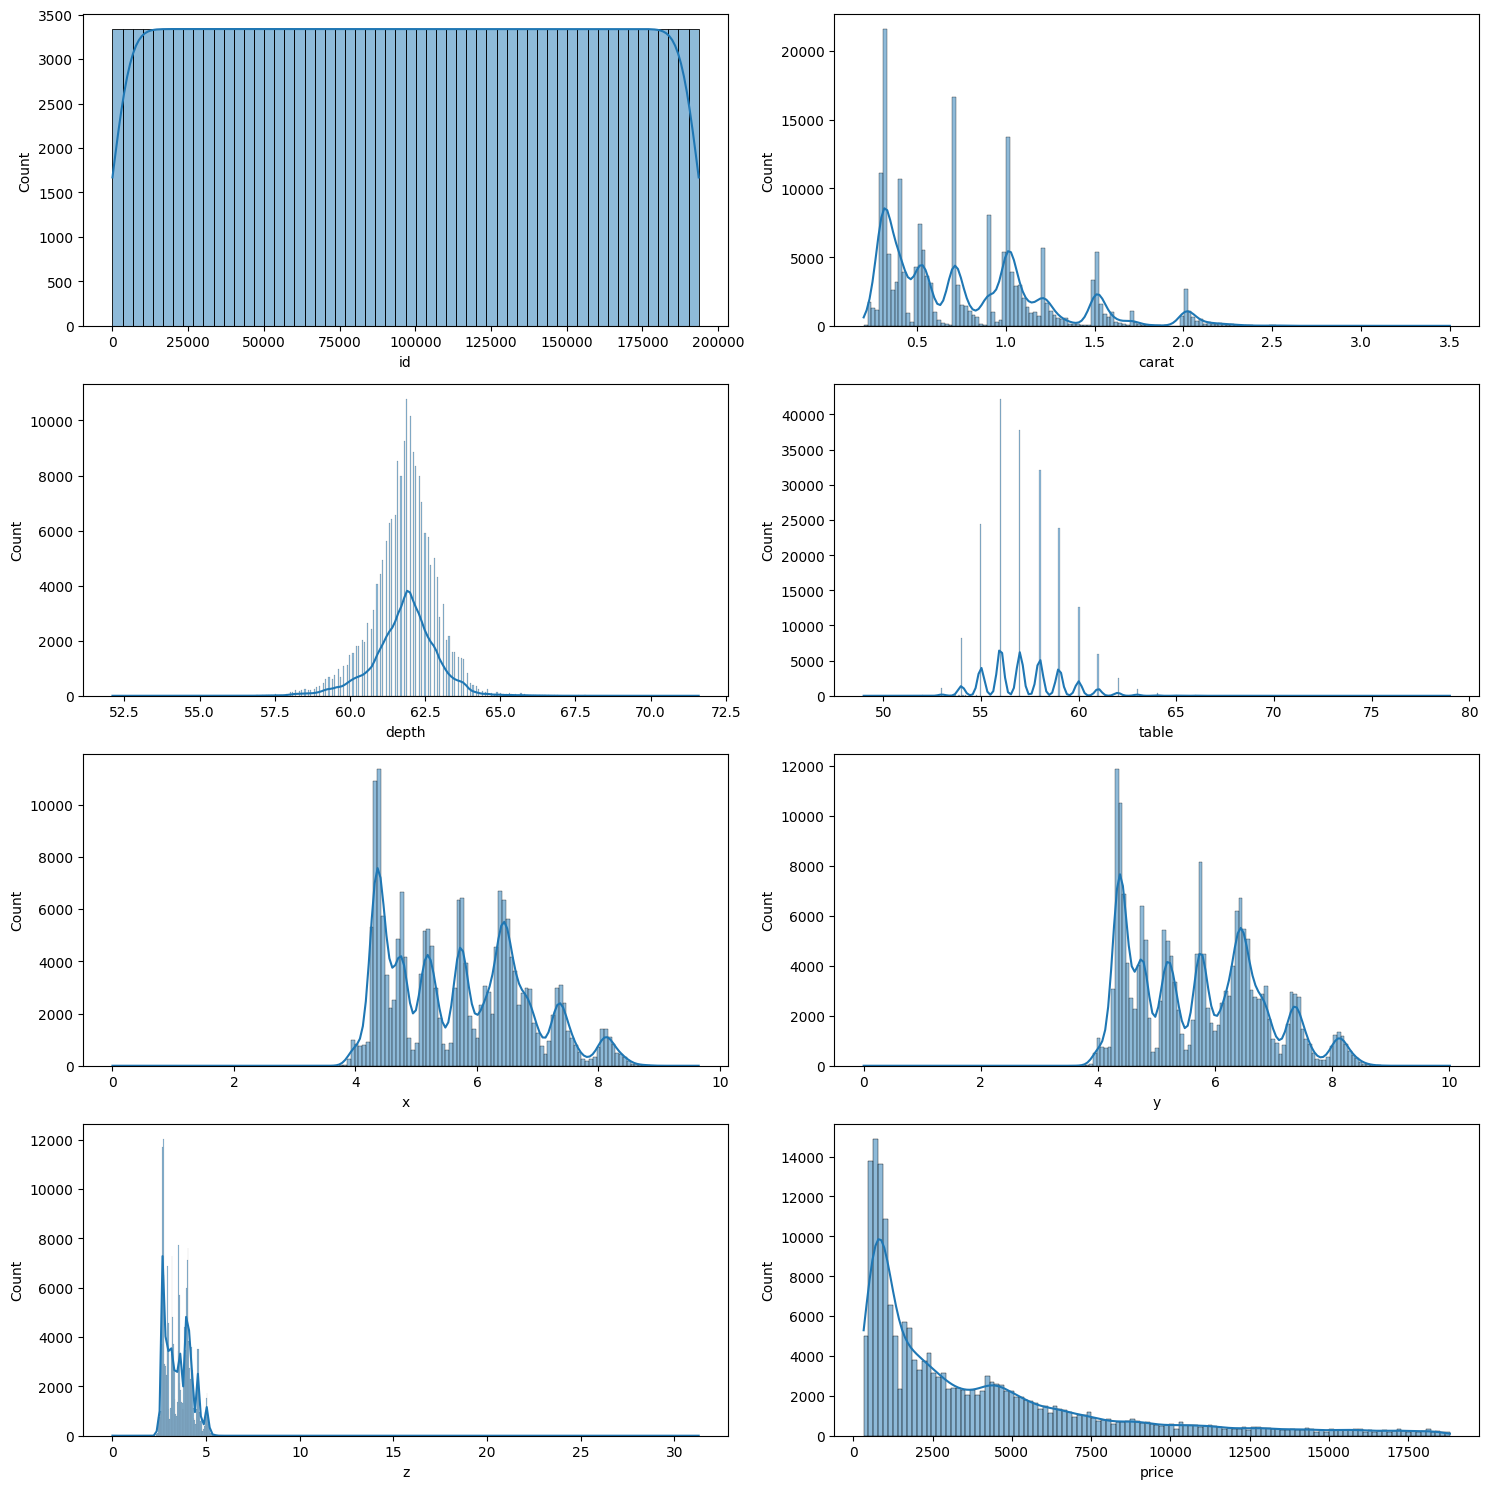

In [38]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

# Assuming numerical_features is a list of numerical feature names
for i, (ax, feature) in enumerate(zip(axs.flatten(), numerical_features)):
    print(i, feature)
    sns.histplot(data=train_df, x=feature, kde=True, ax=ax)

plt.tight_layout()
plt.show()
